In [28]:
# Install necessary packages (only run these once)
!pip install folium                  # Install Folium library for interactive maps
!pip install dash plotly             # Install Dash and Plotly for dashboard creation

# Import necessary libraries
import pandas as pd                   # For data analysis and working with tabular data
import plotly.express as px           # For creating interactive charts easily
from dash import Dash, dcc, html      # Dash components: Dash app, dropdowns, graphs, HTML elements
from dash.dependencies import Input, Output  # To connect user inputs (dropdowns) to outputs (charts)
import numpy as np                     # For numerical operations and array manipulation
import matplotlib.pyplot as plt        # For plotting static charts
import seaborn as sns                  # For enhanced visualization of charts
import folium                          # For creating interactive maps
from jupyter_dash import JupyterDash   # Dash version optimized for Jupyter Notebook

# To improve the appearance of Matplotlib and Seaborn charts
sns.set(style="whitegrid")            # Sets a white grid background for plots (cleaner look)


Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


ModuleNotFoundError: No module named 'jupyter_dash'

In [29]:
# Read the data
df = pd.read_csv(r"C:\Users\Admin\OneDrive\سطح المكتب\Progect\Australia Wildfire Analysis & Dashboard\Historical_Wildfires.csv")

# Show the first 5 rows to confirm
df.head()


,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


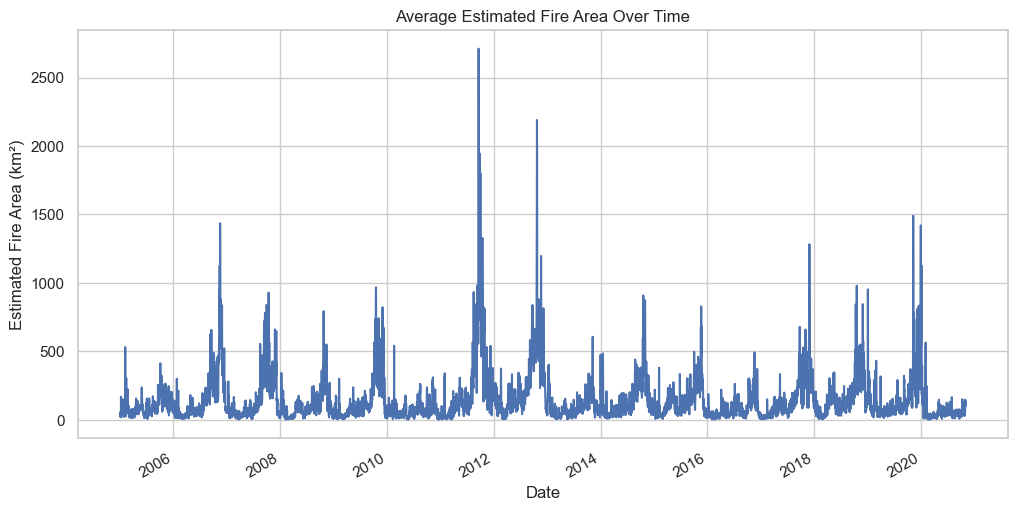

In [30]:

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])  
# This ensures pandas recognizes it as dates, allowing time-based grouping and plotting

# Group the data by 'Date' and calculate the mean of 'Estimated_fire_area' for each date
monthly_area = df.groupby('Date')['Estimated_fire_area'].mean()  
# This gives the average fire area for each date

# Create a figure with a specific size (width=12 inches, height=6 inches)
plt.figure(figsize=(12,6))  

# Plot the time series of average estimated fire area
monthly_area.plot()  

# Add a title to the plot
plt.title("Average Estimated Fire Area Over Time")  

# Label the x-axis
plt.xlabel("Date")  

# Label the y-axis
plt.ylabel("Estimated Fire Area (km²)")  

# Display the plot
plt.show()  


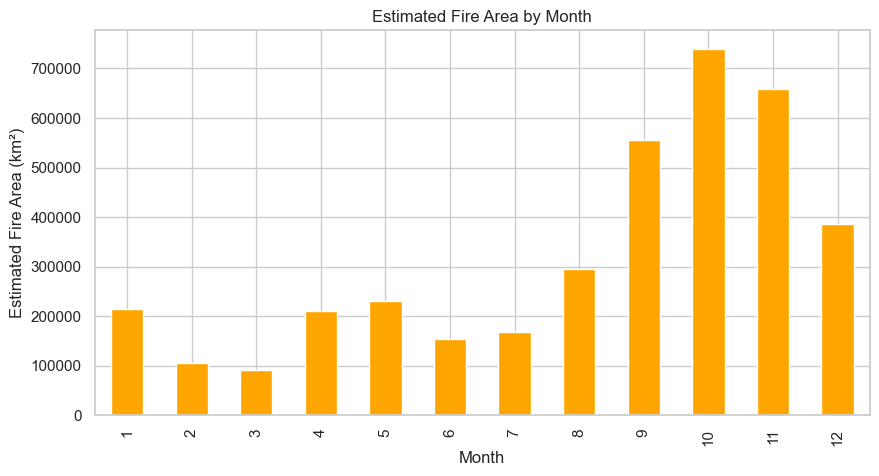

In [31]:
# Extract the month from the 'Date' column and create a new 'Month' column
df['Month'] = df['Date'].dt.month  
# This allows grouping data by month

# Group the data by 'Month' and sum the 'Estimated_fire_area' for each month
monthly_sum = df.groupby('Month')['Estimated_fire_area'].sum()  
# This gives the total fire area for each month across all years

# Create a figure with a specific size (width=10 inches, height=5 inches)
plt.figure(figsize=(10,5))  

# Plot a bar chart of total estimated fire area by month, colored orange
monthly_sum.plot(kind='bar', color='orange')  

# Add a title to the chart
plt.title("Estimated Fire Area by Month")  

# Label the x-axis
plt.xlabel("Month")  

# Label the y-axis
plt.ylabel("Estimated Fire Area (km²)")  

# Display the plot
plt.show()  


In [32]:
# Create a figure with specific size (width=10 inches, height=6 inches)
plt.figure(figsize=(10,6))  

# Create a bar plot using seaborn
# 'x' is the Region column, 'y' is the Mean_estimated_fire_brightness column
# This will show the average fire brightness per region
sns.barplot(x='Region', y='Mean_estimated_fire_brightness',_


SyntaxError: incomplete input (2575414456.py, line 7)

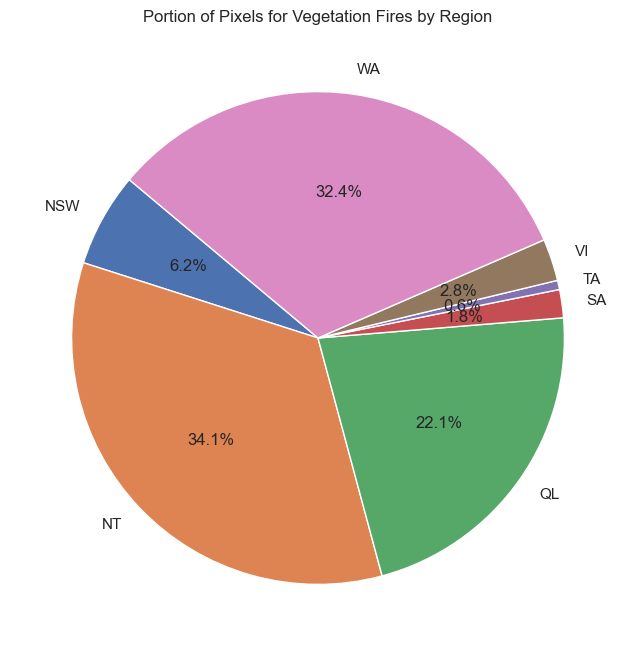

In [33]:
# Group data by 'Region' and sum the 'Count' of fire pixels for each region
region_counts = df.groupby('Region')['Count'].sum()  

# Create a figure with specific size (width=8 inches, height=8 inches)
plt.figure(figsize=(8,8))  

# Create a pie chart
# labels are the region names
# autopct='%1.1f%%' shows the percentage on each slice
# startangle=140 rotates the start of the pie chart for better visualization
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)  

# Add a title to the pie chart
plt.title("Portion of Pixels for Vegetation Fires by Region")  

# Display the pie chart
plt.show()  


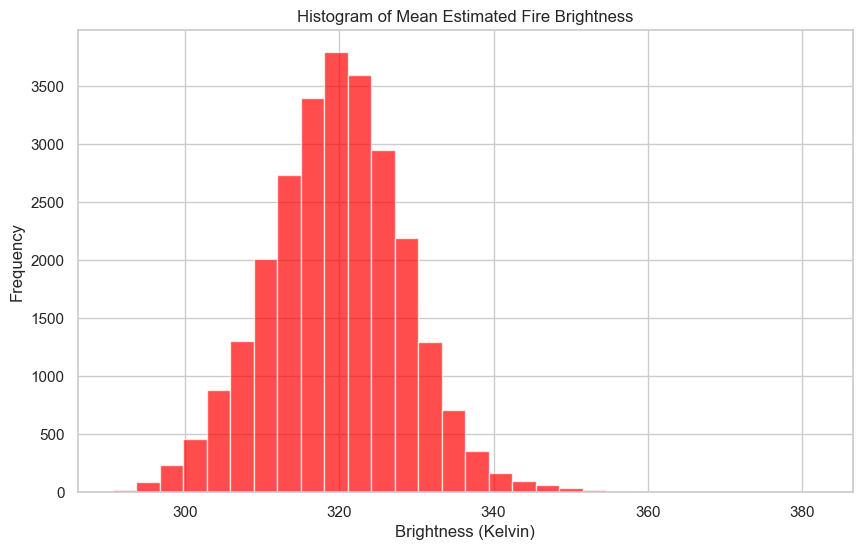

In [34]:
# Create a figure with specific size (width=10 inches, height=6 inches)
plt.figure(figsize=(10,6))  

# Plot a histogram of the 'Mean_estimated_fire_brightness' column
# bins=30 divides the data into 30 intervals
# color='red' sets the color of the bars
# alpha=0.7 sets the transparency of the bars
plt.hist(df['Mean_estimated_fire_brightness'], bins=30, color='red', alpha=0.7)  

# Add a title to the histogram
plt.title("Histogram of Mean Estimated Fire Brightness")  

# Label x-axis
plt.xlabel("Brightness (Kelvin)")  

# Label y-axis
plt.ylabel("Frequency")  

# Display the histogram
plt.show()  


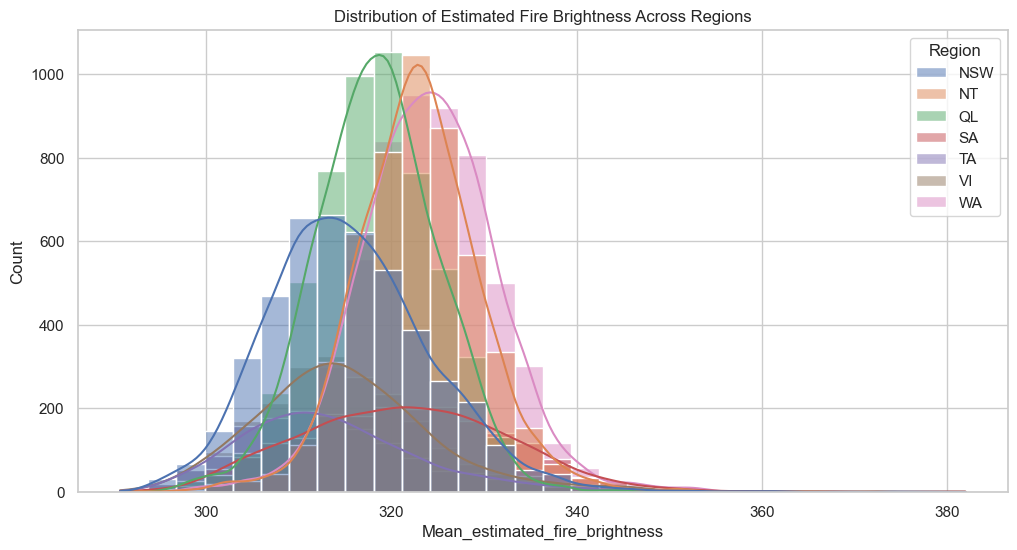

In [35]:
# Create a figure with a specific size (width=12 inches, height=6 inches)
plt.figure(figsize=(12,6))  

# Plot a histogram of 'Mean_estimated_fire_brightness' using seaborn
# data=df specifies the dataframe to use
# x='Mean_estimated_fire_brightness' is the variable on x-axis
# hue='Region' colors the bars according to regions
# bins=30 divides the data into 30 intervals
# kde=True adds a Kernel Density Estimate line for a smooth distribution curve
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', bins=30, kde=True)  

# Add a title to the plot
plt.title("Distribution of Estimated Fire Brightness Across Regions")  

# Display the plot
plt.show()  


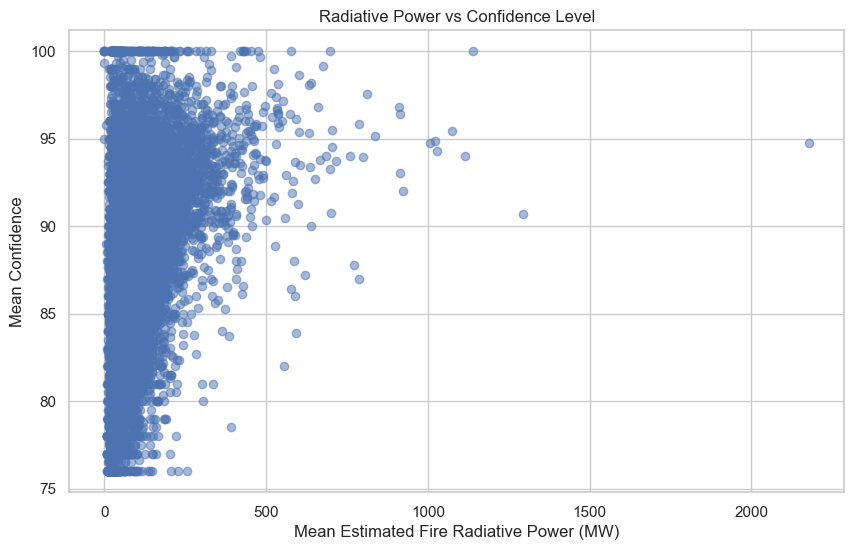

In [36]:
# Create a figure with a specific size (width=10 inches, height=6 inches)
plt.figure(figsize=(10,6))

# Create a scatter plot
# x-axis: 'Mean_estimated_fire_radiative_power'
# y-axis: 'Mean_confidence'
# alpha=0.5 makes the points semi-transparent to handle overlapping points
plt.scatter(df['Mean_estimated_fire_radiative_power'], df['Mean_confidence'], alpha=0.5)

# Add a title to the plot
plt.title("Radiative Power vs Confidence Level")

# Label x-axis
plt.xlabel("Mean Estimated Fire Radiative Power (MW)")

# Label y-axis
plt.ylabel("Mean Confidence")

# Display the plot
plt.show()


In [37]:
# Assume the center of Australia as the initial map location
# zoom_start=4 gives a country-level view
aus_map = folium.Map(location=[-25.2744, 133.7751], zoom_start=4)

# Approximate coordinates for each Region in the dataset
region_coords = {
    "Region1": [-34.0, 151.0],
    "Region2": [-37.8, 144.9],
    "Region3": [-31.9, 115.9],
    "Region4": [-12.5, 130.8],
    "Region5": [-28.0, 153.4],
    "Region6": [-20.9, 142.0],
    "Region7": [-42.0, 147.3]
}

# Loop through each region and add a marker to the map
for region, coords in region_coords.items():
    # Add a marker at the region coordinates with a popup label showing the region name
    folium.Marker(location=coords, popup=region).add_to(aus_map)

# Display the map
aus_map


In [38]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Admin\OneDrive\سطح المكتب\Progect\Australia Wildfire Analysis & Dashboard\Historical_Wildfires.csv")
df['Date'] = pd.to_datetime(df['Date'])    # Convert 'Date' column to datetime format
df['Month'] = df['Date'].dt.month          # Create a new column for month number

# Initialize the Dash app
app = Dash(__name__)

# Define the app layout (UI)
app.layout = html.Div([
    html.H1("Australia Wildfire Dashboard"),  # Page title
    
    dcc.Dropdown(                              # Dropdown to select Region
        id='select-region',
        options=[{'label': i, 'value': i} for i in df['Region'].unique()],
        value=df['Region'].unique()[0]        # Default value
    ),
    
    dcc.Dropdown(                              # Dropdown to select Year
        id='select-year',
        options=[{'label': i, 'value': i} for i in df['Date'].dt.year.unique()],
        value=df['Date'].dt.year.min()        # Default value is the earliest year
    ),
    
    dcc.Graph(id='pie-fire-area'),             # Placeholder for Pie Chart
    dcc.Graph(id='bar-count')                  # Placeholder for Bar Chart
])

# Define callback to update charts based on user selections
@app.callback(
    [Output('pie-fire-area', 'figure'),       # Output for Pie Chart
     Output('bar-count', 'figure')],         # Output for Bar Chart
    [Input('select-region', 'value'),        # Input: selected region
     Input('select-year', 'value')]          # Input: selected year
)
def update_dashboard(selected_region, selected_year):
    # Filter the dataset based on selected region and year
    filtered = df[(df['Region'] == selected_region) & (df['Date'].dt.year == selected_year)]
    
    # Pie chart: Total estimated fire area by month
    monthly_area = filtered.groupby('Month')['Estimated_fire_area'].sum().reset_index()
    fig1 = px.pie(
        monthly_area,
        names='Month',                         # Month names for slices
        values='Estimated_fire_area',          # Sum of fire area for each month
        title="Monthly Avg Estimated Fire Area"
    )
    
    # Bar chart: Total count of fire pixels by month
    monthly_count = filtered.groupby('Month')['Count'].sum().reset_index()
    fig2 = px.bar(
        monthly_count,
        x='Month',                             # X-axis: months
        y='Count',                             # Y-axis: number of pixels
        title="Monthly Avg Count of Pixels"
    )
    
    # Return both figures to update the dashboard
    return fig1, fig2

# Run the app
if __name__ == '__main__':
    app.run()  # Use run() instead of run_server() in the latest Dash version
